# 04_10 앙케이트 분석을 위한 자연어 처리 테크닉 10

#### 고객의 소리:  
고객사는 이 도시에서 부동산업을 경영하고 있다.  
정부 기관과 유대감이 깊어 도시 건설 제안을 의뢰받는 경우가 있다.  
회사와 관계있는 고객과 동업자의 협조로 설문조사를 시행했다.  
유익한 정보가 많아 AI를 사용한 분석을 원한다.  
알기 쉽게 보고서를 작성하면 정부 기관에 제안하기 쉬울 것 같다고 생각한다.

#### 전제조건:
1. 캠페인 기간(2019년 1월 ~ 4월)의 4개월 동안 모은 고객만족도 설문조사 데이터가 데이터베이스에 기록되어 있다.  
2. 설문조사를 한 날짜, 의견, 만족도(5단 평가)의 결과가 들어있다.

#### 데이터 정보:
|No.|파일 이름|개요|
|-|-|-|
|1|survey.csv|앙케이트 결과|

In [1]:
import warnings
warnings.filterwarnings('ignore')

### 테크닉091: 데이터를 불러서 파악해 보자

In [2]:
import pandas as pd
survey = pd.read_csv('/Users/adam/Data_Analytics/Python/Field/10/survey.csv')
print(len(survey))
survey.head()

86


,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(AA역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2


##### 결측치 확인 

In [3]:
survey.isna().sum()

datetime        0
comment         2
satisfaction    0
dtype: int64

##### 결측치 제거

In [4]:
survey = survey.dropna()
survey.isna().sum()

datetime        0
comment         0
satisfaction    0
dtype: int64

### 테크닉092: 불필요한 문제를 제거하자

In [5]:
survey["comment"] = survey["comment"].str.replace("AA", "")
survey.head()

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다(역),1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다(대기아동 없음),4
4,2019-01-06,역앞 상가가 쓸쓸하다,2


##### 정규표현식을 사용한 괄호 속 문장 제거

In [6]:
survey["comment"] = survey["comment"].str.replace("\(.+?\)", "")
survey.head()

,datetime,comment,satisfaction
0,2019-03-11,역앞에 젊은이들이 모여있다,1
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5
2,2019-02-18,육아 지원이 좋다,5
3,2019-04-09,어린이집에 바로 입원할 수 있다,4
4,2019-01-06,역앞 상가가 쓸쓸하다,2


### 테크닉093: 문자 수를 세어 히스토그램으로 표시해 보자

##### comment의 문자 수를 계산한다

In [7]:
survey["length"] = survey["comment"].str.len()
survey.head()

,datetime,comment,satisfaction,length
0,2019-03-11,역앞에 젊은이들이 모여있다,1,14
1,2019-02-25,운동할 수 있는 장소가 있는 것이 좋다,5,21
2,2019-02-18,육아 지원이 좋다,5,9
3,2019-04-09,어린이집에 바로 입원할 수 있다,4,17
4,2019-01-06,역앞 상가가 쓸쓸하다,2,11


##### 계산된 length 컬럼을 이용한 히스토그램 생성

(array([20., 19., 20., 10.,  7.,  3.,  3.,  1.,  0.,  1.]),
 array([ 6. , 11.6, 17.2, 22.8, 28.4, 34. , 39.6, 45.2, 50.8, 56.4, 62. ]),
 <BarContainer object of 10 artists>)

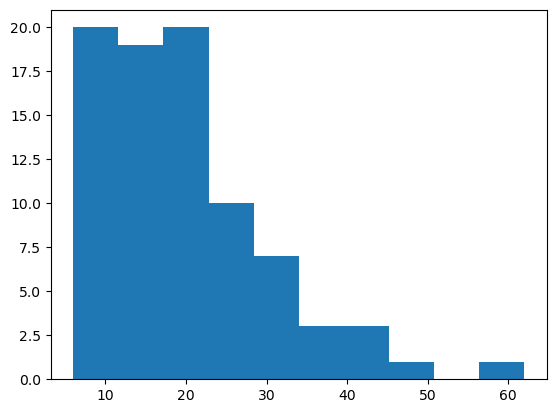

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.hist(survey["length"])

### 테크닉094: 형태소 분석으로 문장을 분해해 보자

In [10]:
from konlpy.tag import Twitter
twt = Twitter()
text = "형태소분석으로 문장을 분해해보자"
tagging = twt.pos(text)
tagging

[('형태소', 'Noun'),
 ('분석', 'Noun'),
 ('으로', 'Josa'),
 ('문장', 'Noun'),
 ('을', 'Josa'),
 ('분해', 'Noun'),
 ('해보자', 'Verb')]

##### 단어만 별도로 리스트 형 벼수에 저장

In [11]:
words = twt.pos(text)
words_arr = []
for i in words:
    if i == 'EOS': continue
    word_tmp = i[0]
    words_arr.append(word_tmp)
words_arr

['형태소', '분석', '으로', '문장', '을', '분해', '해보자']

### 테크닉095: 형태소 분석으로 문장에서 '동사', '명사'를 추출해 보자

In [12]:
text = "형태소분석으로 문장을 분해해보자"
words_arr = []
parts = ["Noun", "Verb"]
words = twt.pos(text)
words_arr = []
for i in words:
    if i == 'EOS' or i == '': continue
    word_tmp = i[0]
    part = i[1]
    if not (part in parts): continue
    words_arr.append(word_tmp)
words_arr

['형태소', '분석', '문장', '분해', '해보자']

### 테크닉096: 형태소 분석으로 자주 나오는 명사를 확인해 보자

In [13]:
all_words = []
parts = ["Noun"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = twt.pos(text)
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i[0]
        part = i[1]
        if not (part in parts): continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

['역앞', '젊은이', '운동', '수', '장소', '것', '육아', '지원이', '어린이집', '바로', '입원', '수', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '좀', '더', '병원', '사이클링', '코스', '축제', '좀', '더', '성대', '초등학교', '공원', '더', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '좀', '더', '밤길', '쓰레기', '처리', '영화관', '가로수', '더', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '게', '해', '상가', '지붕', '비', '큰일', '상가', '더', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '더', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '수', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '더', '소방', '활동', '수', '재난', '시', '피난', '장소', '것', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '수', '지역', '자치', '단체', '더', '지원', '자치', '단체', '활동', '안심', '살', '수', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금'

##### 단어의 빈도수 확인

In [15]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count", ascending=False).head()

,count
words,
더,14
수,7
장소,6
주차장,5
좀,5


### 테크닉097: 관계없는 단어를 제거해 보자

In [17]:
stop_words = ["더","수","좀"]
all_words = []
parts = ["Noun"]
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = twt.pos(text)
    words_arr = []
    for i in words:
        if i == "EOS" or i =="": continue
        word_tmp = i[0]
        part = i [1]
        if not (part in parts): continue
        if word_tmp in stop_words:continue
        words_arr.append(word_tmp)
    all_words.extend(words_arr)
print(all_words)

['역앞', '젊은이', '운동', '장소', '것', '육아', '지원이', '어린이집', '바로', '입원', '역앞', '상가', '생활', '놀', '장소', '놀', '장소', '상업시설', '병원', '사이클링', '코스', '축제', '성대', '초등학교', '공원', '근처', '공원', '살기', '슈퍼', '육아', '데이트', '명소', '상가', '밤길', '쓰레기', '처리', '영화관', '가로수', '공원', '추가', '관광', '명소', '육아', '최고', '길이', '시내', '접근성', '집세', '합리', '의', '교통', '체증', '게', '해', '상가', '지붕', '비', '큰일', '상가', '카페', '스포츠', '센터', '자주', '이용', '스포츠', '센터', '이용', '요금', '워킹맘', '지원', '버스', '별로', '안', '자전거', '달리기', '달리기', '운동', '장소', '기업', '역앞', '주차장', '아저씨', '말', '적', '경찰', '순찰', '소방', '활동', '재난', '시', '피난', '장소', '것', '요즘', '강', '범람', '피해', '크게', '이', '도시', '범람', '방지', '취하', '설명', '신호등', '사거리', '때문', '사고', '신호', '상가', '활성화', '활동', '좀더', '행정', '뒷받침', '아이', '놀', '장소', '역앞', '자전거', '주차장', '가로수', '낙엽', '청소', '가로수', '재해', '시', '비축', '상황', '보도', '길이', '지역', '자치', '단체', '지원', '자치', '단체', '활동', '안심', '살', '관광지', '최근', '지방', '넘버', '치안', '제대로', '주차장', '수가', '요금', '역', '앞', '공공', '주차장', '보행자', '용', '신호', '노인', '어린이', '생각', '설정', '급행', '시내', '버스', '노선'

In [20]:
all_words_df = pd.DataFrame({"words":all_words, "count":len(all_words)*[1]})
all_words_df = all_words_df.groupby("words").sum()
all_words_df.sort_values("count",ascending=False).head()

,count
words,
장소,6
주차장,5
상가,5
역앞,5
공원,5


### 테크닉098: 고객만족도와 자주 나오는 단어의 관계를 살펴보자

In [21]:
stop_words = ["더","수","좀"]
parts = ["Noun"]
all_words = []
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = twt.pos(text)
    words_arr = []
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i[0]
        part = i[1]
        if not (part in parts): continue
        if word_tmp in stop_words: continue
        words_arr.append(word_tmp)
        satisfaction.append(survey["satisfaction"].iloc[n])
    all_words.extend(words_arr)
all_words_df = pd.DataFrame({"words":all_words, "satisfaction":satisfaction, "count":len(all_words)*[1]})
all_words_df.head()

,words,satisfaction,count
0,역앞,1,1
1,젊은이,1,1
2,운동,5,1
3,장소,5,1
4,것,5,1


##### words마다 만족도 집계 하기

In [22]:
words_satisfaction = all_words_df.groupby("words").mean()["satisfaction"]
words_count = all_words_df.groupby("words").sum()["count"]
words_df = pd.concat([words_satisfaction, words_count], axis=1)
words_df.head()

,satisfaction,count
words,,
가로수,1.666667,3
강,3.000000,1
거리,5.000000,1
걱정,2.000000,1
걸,2.000000,1


In [23]:
words_df = words_df.loc[words_df["count"]>=3]
words_df.sort_values("satisfaction", ascending=False).head()

,satisfaction,count
words,,
육아,4.333333,3
관공서,3.500000,4
길이,3.500000,4
활동,3.333333,3
장소,3.000000,6


In [24]:
words_df.sort_values("satisfaction").head()

,satisfaction,count
words,,
주차장,1.000000,5
역앞,1.200000,5
가로수,1.666667,3
놀,2.000000,3
지원,2.000000,3


### 테크닉099: 의견을 특징으로 표현해 보자

In [25]:
parts = ["Noun"]
all_words_df = pd.DataFrame()
satisfaction = []
for n in range(len(survey)):
    text = survey["comment"].iloc[n]
    words = twt.pos(text)
    words_df = pd.DataFrame()
    for i in words:
        if i == "EOS" or i == "": continue
        word_tmp = i[0]
        part = i[1]
        if not (part in parts): continue
        words_df[word_tmp] = [1]
    all_words_df = pd.concat([all_words_df, words_df], ignore_index=True)
all_words_df.head()

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,걸,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구
0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### 결측치에 0을 대입하기

In [26]:
all_words_df = all_words_df.fillna(0)
all_words_df.head()

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,걸,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 테크닉100: 비슷한 설문지를 찾아보자

In [27]:
print(survey["comment"].iloc[2])
target_text = all_words_df.iloc[2]
print(target_text)

육아 지원이 좋다
역앞      0.0
젊은이     0.0
운동      0.0
수       0.0
장소      0.0
       ... 
잔디밭     0.0
아주      0.0
설문지     0.0
투고      0.0
놀이기구    0.0
Name: 2, Length: 187, dtype: float64


##### 유사도 검색 진행

In [28]:
import numpy as np
cos_sim = []
for i in range(len(all_words_df)):
    cos_text = all_words_df.iloc[i]
    cos = np.dot(target_text, cos_text) / (np.linalg.norm(target_text) * np.linalg.norm(cos_text))
    cos_sim.append(cos)
all_words_df["cos_sim"] = cos_sim
all_words_df.sort_values("cos_sim", ascending=False).head()

,역앞,젊은이,운동,수,장소,것,육아,지원이,어린이집,바로,...,야간,불안,고령자,운동장,잔디밭,아주,설문지,투고,놀이기구,cos_sim
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000
15,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.707107
24,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500000
55,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
62,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


##### 상위 의견 표시

In [29]:
print(survey["comment"].iloc[2])
print(survey["comment"].iloc[15])
print(survey["comment"].iloc[24])

육아 지원이 좋다
육아가 쉽다
육아하기에는 최고
